In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

# The unforced Duffing oscillator 

<p align="center">
<img src="Imgs/unforced_duffing.png" alt="terms" width="300"/>
</p>

In [2]:
# Duffing Oscillator
def Duff(x,y,delta):
    dx = y
    dy = x-np.power(x,3)-delta*y 
    return dx,dy

# plot
delta = 0.5
F = lambda x,y: Duff(x,y,delta)

## Visualizing the vector field

<IPython.core.display.Javascript object>


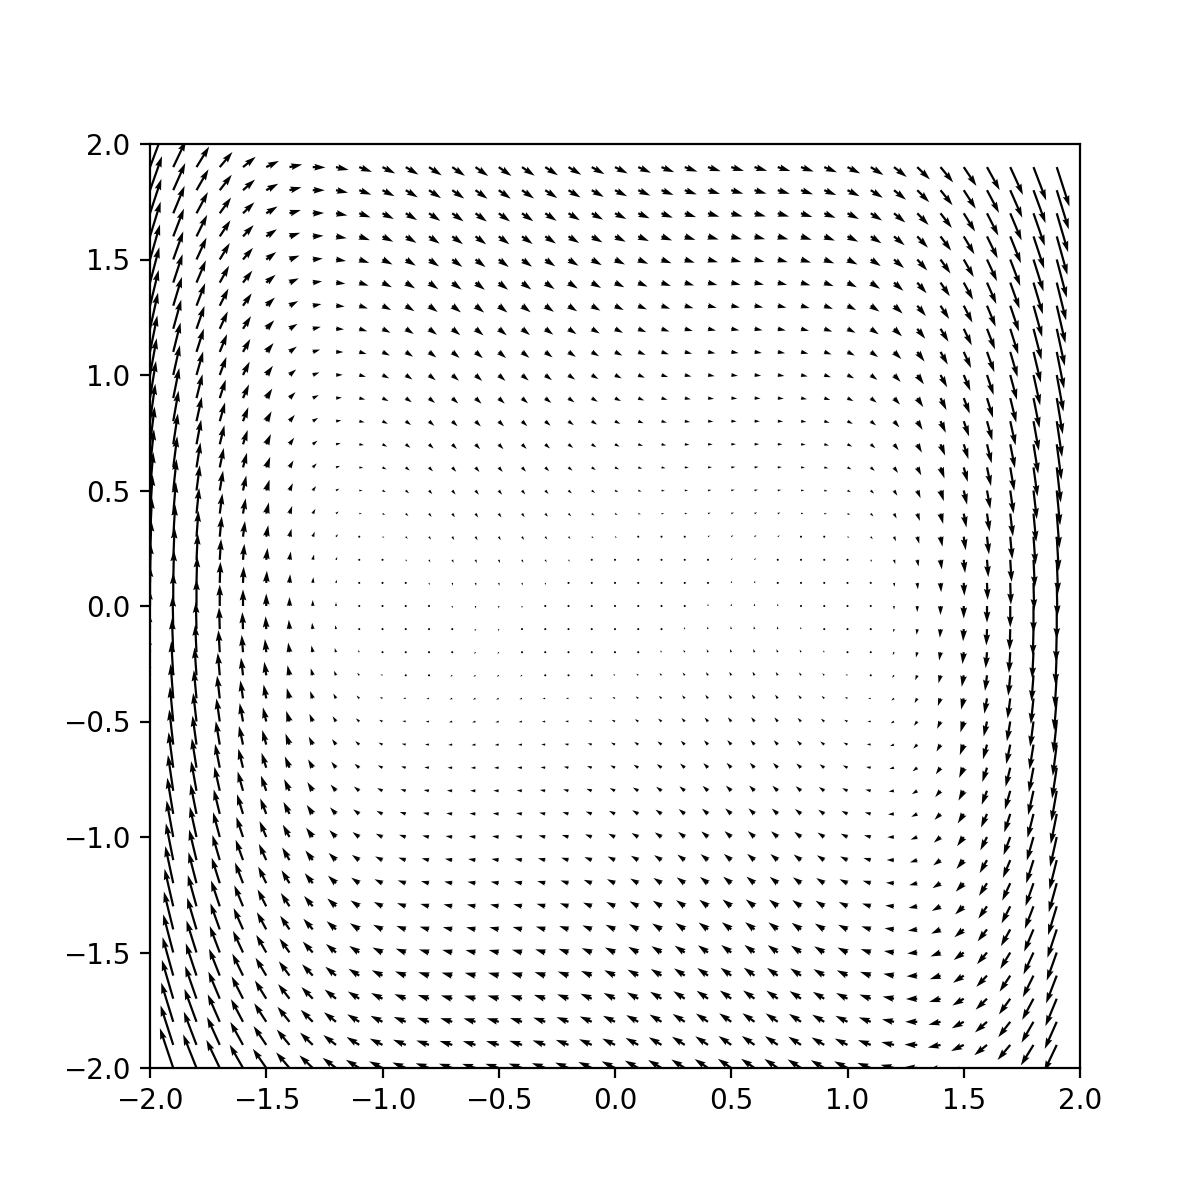

In [3]:
# function that plots the vector field of 2D continuous Dynamical Systems
def VectorField(F,xlim=[-2,2],ylim=[-2,2],dquiver=0.1):
    
    plt.figure(figsize=(6,6))
    X, Y = np.meshgrid(np.arange(xlim[0],xlim[1],dquiver), np.arange(ylim[0],ylim[1],dquiver))
    dX, dY = F(X,Y)
    
    plt.quiver(X, Y, dX, dY, units='width')
    plt.xlim(xlim)
    plt.ylim(ylim)

    
# plot vector field
VectorField(F)

## Stability analysis

### Fixed point (0,0)

In [4]:
Df = [[0, 1], [1, -delta]]
lambdas,_ = np.linalg.eig(Df)

print(f"The eigenvalues of the Jacobian evaluated at (0,0) are: {lambdas}")

The eigenvalues of the Jacobian evaluated at (0,0) are: [ 0.78077641 -1.28077641]


### Fixed point (1,0)

In [5]:
Df = [[0, 1], [-2, -delta]]
lambdas,_ = np.linalg.eig(Df)

print(f"The eigenvalues of the Jacobian evaluated at (1,0) are: {lambdas}")

The eigenvalues of the Jacobian evaluated at (1,0) are: [-0.25+1.39194109j -0.25-1.39194109j]


### Fixed point (-1,0)

In [6]:
Df = [[0, 1], [-2, -delta]]
lambdas,_ = np.linalg.eig(Df)

print(f"The eigenvalues of the Jacobian evaluated at (-1,0) are: {lambdas}")

The eigenvalues of the Jacobian evaluated at (-1,0) are: [-0.25+1.39194109j -0.25-1.39194109j]


In [7]:
# function to help plot 2D solutions of continuous Dynamical Systems
def MultiPhasePlot(F,IC,dt=0.001,t_max=50,quiver=True,xlim=[-2,2],ylim=[-2,2],dquiver=0.1):
    """
    Returns the numerically integrated (euler method) solutions of 2D dX/dt = F(X) for all initial conditions in list IC.
    F must be a R^2-->R^2 vector field of the form dx,dy = F(x,y).
    """
    num_steps = int(t_max/dt)
    Traj = []
    for ic in IC:
        traj = np.ndarray([num_steps,2],dtype=float) #container for solution
        traj[0,0], traj[0,1] = ic[0], ic[1]
        for t in range(1,num_steps): #euler integration
            traj[t,:] = traj[t-1,:]+dt*np.array(F(traj[t-1,0],traj[t-1,1]))
        Traj.append(traj)
    
    # plot
    plt.figure()
    for traj in Traj:
        plt.plot(traj[:,0],traj[:,1])
        plt.plot(traj[0,0],traj[0,1],'k.')
    if quiver:
        X, Y = np.meshgrid(np.arange(xlim[0],xlim[1],dquiver), np.arange(ylim[0],ylim[1],dquiver))
        dX, dY = F(X,Y)
        plt.quiver(X, Y, dX, dY, units='width')
    plt.xlim(xlim)
    plt.ylim(ylim)

<IPython.core.display.Javascript object>


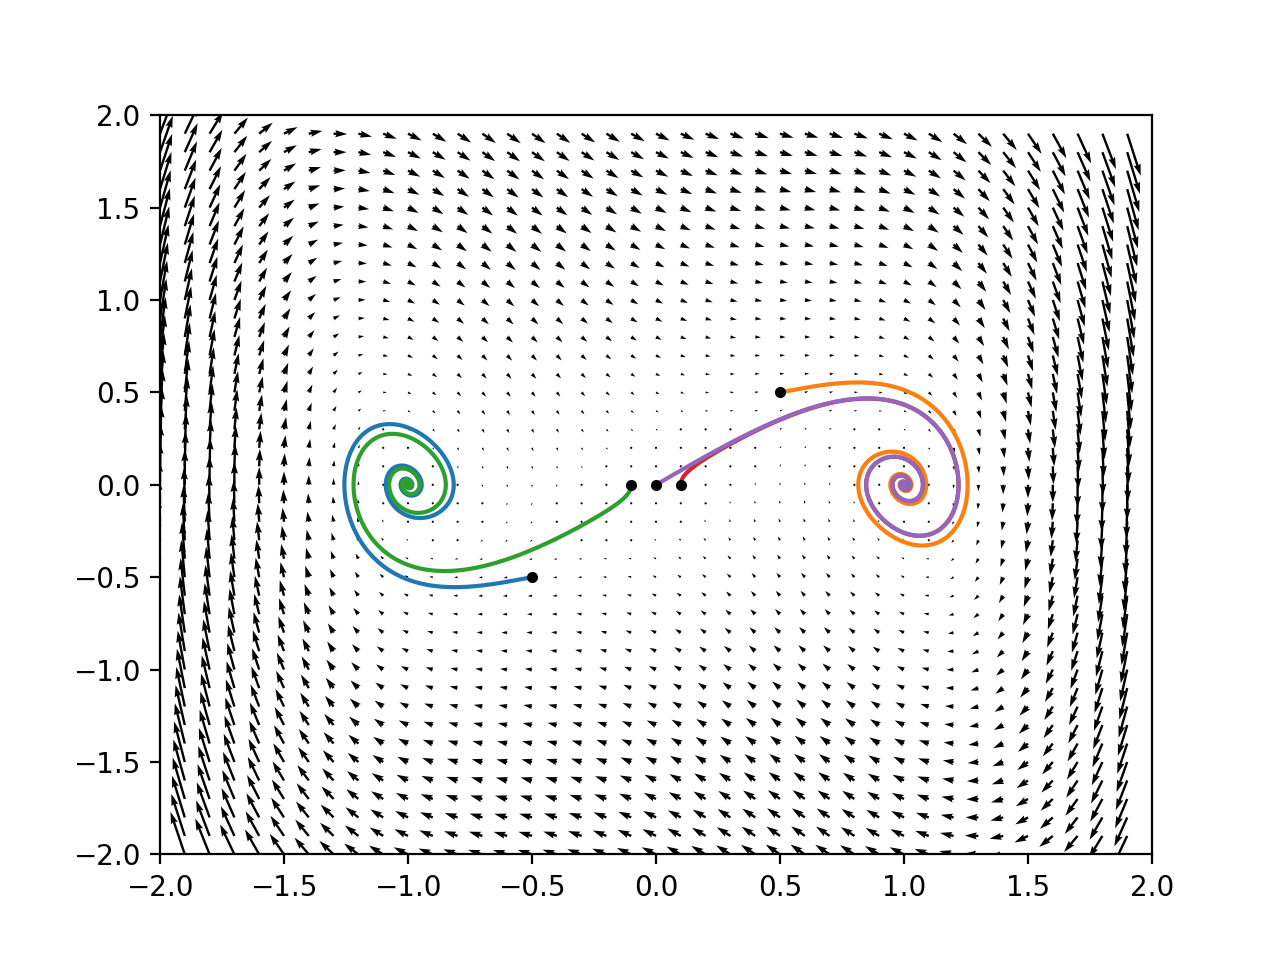

In [8]:
# Trajectories in phase space
IC = [[-.5,-.5],[.5,.5],[-.1,0.],[.1,0],[0.001,0]]
MultiPhasePlot(F,IC,quiver=True)

## Basins of Attraction

<IPython.core.display.Javascript object>


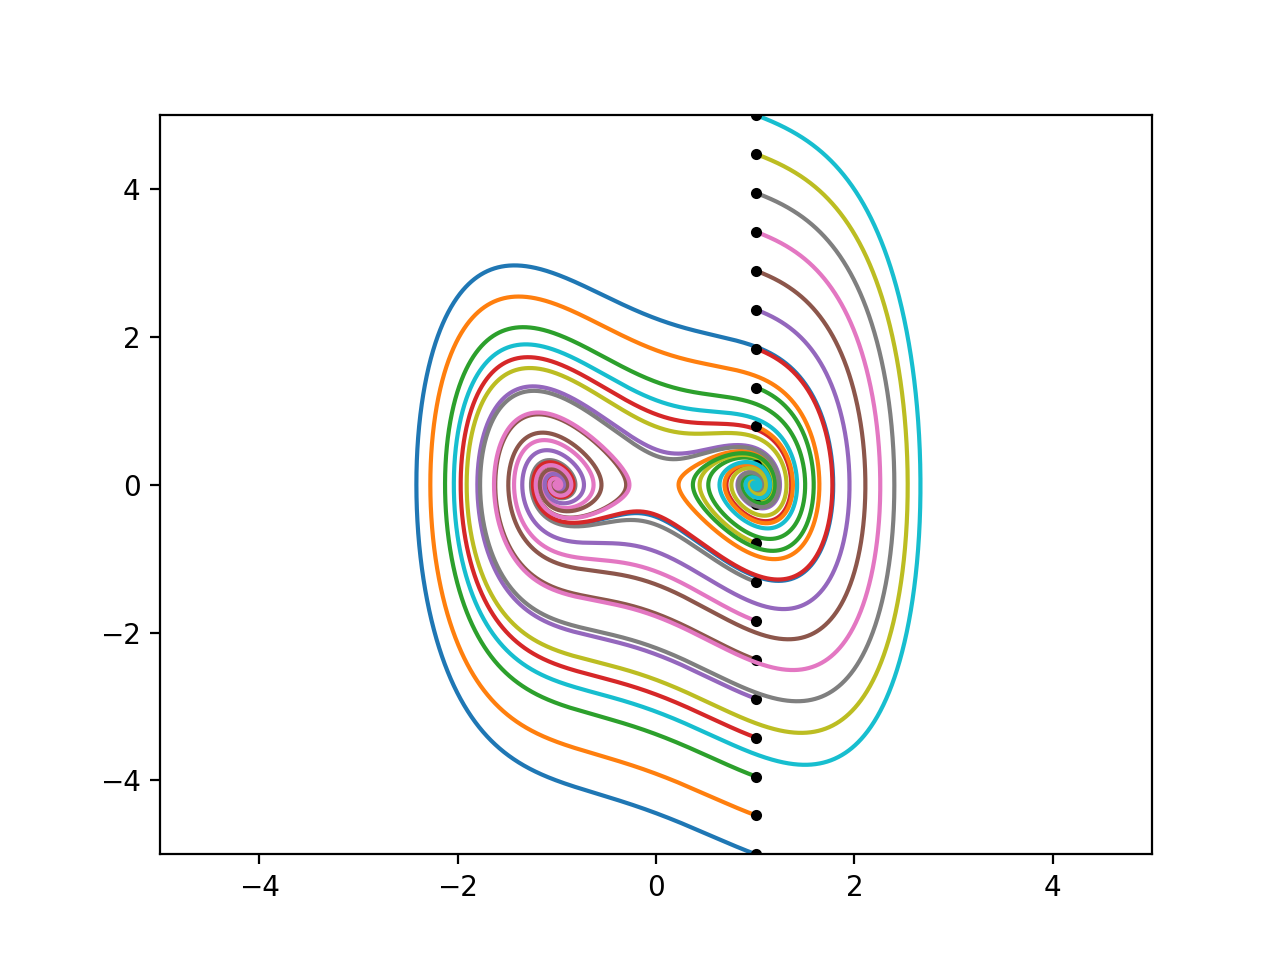

In [9]:
IC = [[1.01,x] for x in np.linspace(-5,5,20)]
F = lambda x,y: Duff(x,y,delta)
MultiPhasePlot(F,IC,xlim=[-5,5],ylim=[-5,5],quiver=False)

# IC = [[1.01,x] for x in np.linspace(-100,100,20)]
# F = lambda x,y: Duff(x,y,delta)
# MultiPhasePlot(F,IC,xlim=[-15,15],ylim=[-120,120],quiver=False)

# Intro to bifurcation theory! 

Bifurcation theory concerns the analysis of the sensitivity of the dynamics of a system with respect to its parameters! 

##   Case 1: delta > 0

<p align="center">
<img src="Imgs/unforced_duffing.png" alt="terms" width="300"/>
</p>

In [ ]:
def Duff(x,y,delta):
    dx = y
    dy = x-np.power(x,3)-delta*y 
    return dx,dy

# plot
delta = 0.5
F = lambda x,y: Duff(x,y,delta)

IC = [[-.5,-.5],[.5,.5],[-.1,0.],[.1,0],[0.001,0],[0, -0.001]]
MultiPhasePlot(F,IC,xlim=[-1.5,1.5],ylim=[-1.5,1.5],quiver=False)

# Eigenvalues
Df = [[0, 1], [1, -delta]]
lambdas,_ = np.linalg.eig(Df)
print(f"The eigenvalues of the Jacobian evaluated at (0,0) are: {lambdas}")

Df = [[0, 1], [-2, -delta]]
lambdas,_ = np.linalg.eig(Df)
print(f"The eigenvalues of the Jacobian evaluated at (1,0) are: {lambdas}")

Df = [[0, 1], [-2, -delta]]
lambdas,_ = np.linalg.eig(Df)
print(f"The eigenvalues of the Jacobian evaluated at (-1,0) are: {lambdas}")

##   case 2: delta < 0

<p align="center">
<img src="Imgs/unforced_duffing2.png" alt="terms" width="300"/>
</p>

In [ ]:
def Duff(x,y,delta):
    dx = y
    dy = x-np.power(x,3)-delta*y 
    return dx,dy

# plot
delta = -0.5
F = lambda x,y: Duff(x,y,delta)

IC = [[-.5,-.5],[.5,.5],[-.1,0.],[.1,0],[0.001,0],[0, -0.001]]
MultiPhasePlot(F,IC,t_max=10,xlim=[-2,2],ylim=[-2,2],quiver=False)

# IC = [[1.01,x] for x in np.linspace(-100,100,20)]
# MultiPhasePlot(F,IC,xlim=[-15,15],ylim=[-120,120],quiver=False)

# Eigenvalues
Df = [[0, 1], [1, -delta]]
lambdas,_ = np.linalg.eig(Df)
print(f"The eigenvalues of the Jacobian evaluated at (0,0) are: {lambdas}")

Df = [[0, 1], [-2, -delta]]
lambdas,_ = np.linalg.eig(Df)
print(f"The eigenvalues of the Jacobian evaluated at (1,0) are: {lambdas}")

Df = [[0, 1], [-2, -delta]]
lambdas,_ = np.linalg.eig(Df)
print(f"The eigenvalues of the Jacobian evaluated at (-1,0) are: {lambdas}")